In [289]:
import numpy as np

## Assuming:
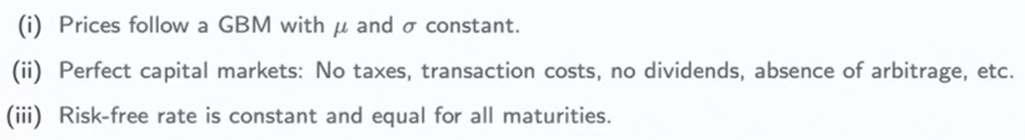

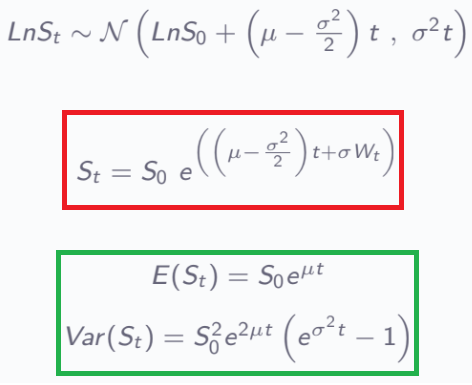

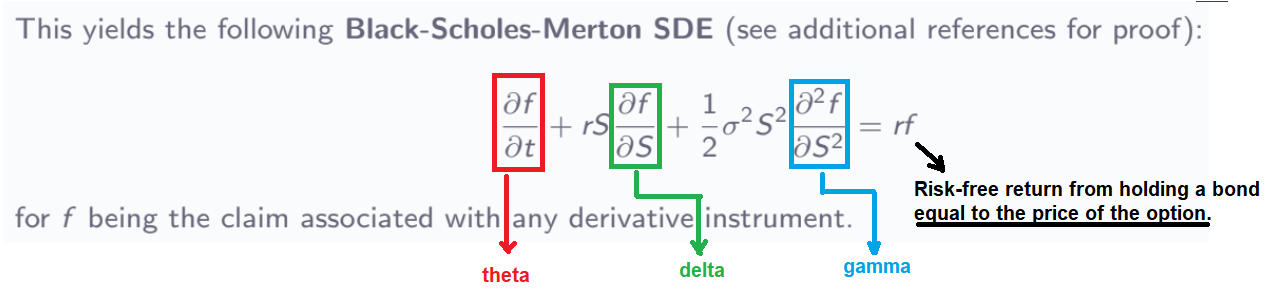

$f:$ Price of the option

$r:$ Risk-free rate

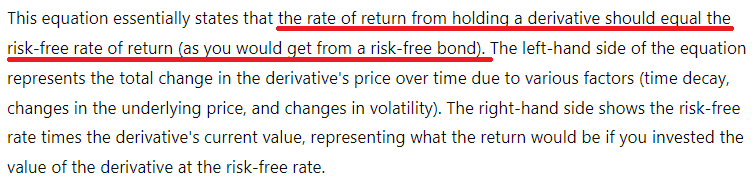

In [290]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm

# Write a Black-Scholes pricer function
def BS(S0, r, sigma, t, T, K, call_or_put="C"):
    dt = T - t
    d1 = (np.log(S0/K) + (r + 1/2*sigma**2)*dt) / (sigma*np.sqrt(dt))
    d2 = (np.log(S0/K) + (r - 1/2*sigma**2)*dt) / (sigma*np.sqrt(dt))
    if call_or_put == "C":  # if call
        return S0 * norm.cdf(d1) - np.exp(-r*dt) * K * norm.cdf(d2)
    else:  # if put
        return np.exp(-r*dt) * K * norm.cdf(-d2) - S0 * norm.cdf(-d1)

In [291]:
S0 = 100
r = 0
sigma = 0.2
t = 0
T = 2
K = 105

BS(S0, r, sigma, t, T, K, "C")

9.197350649294513

# Greeks

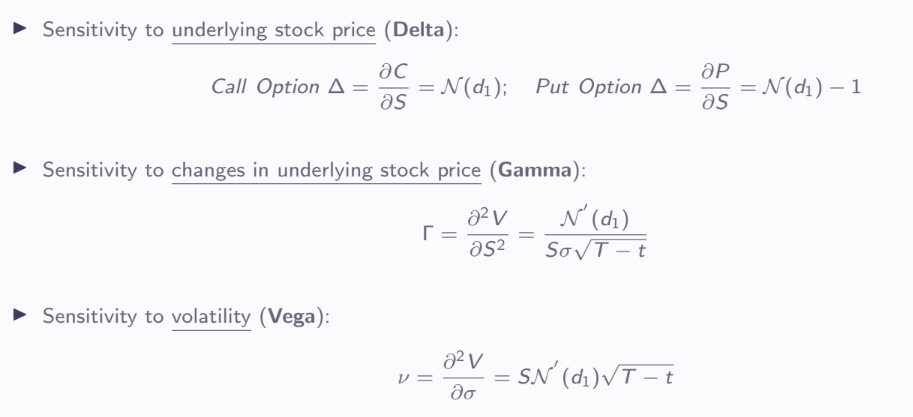

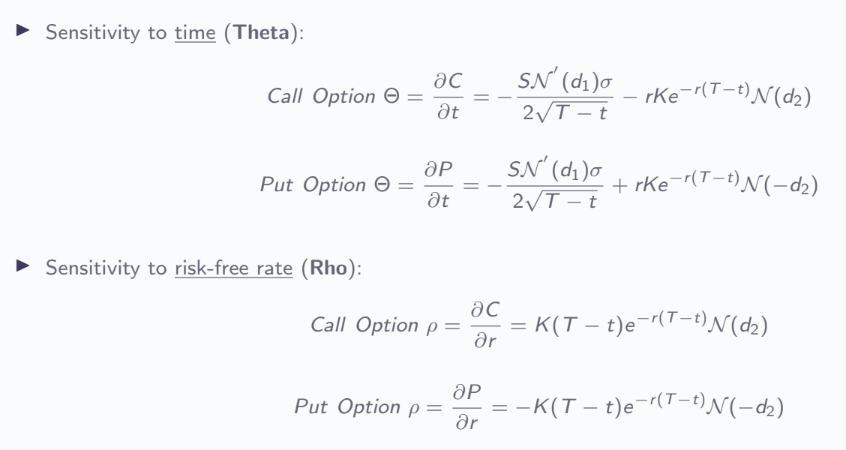

In [292]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 2.0  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 105.0
r = 0
vol = 0.20  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 9.197350649294513
Delta = 0.4876036978454982
Gamma = 0.014097929791127266
Vega = 56.39171916450907
Theta = -2.819585958225453
Rho = 79.1260382705106


__________

# Interest Rate Models

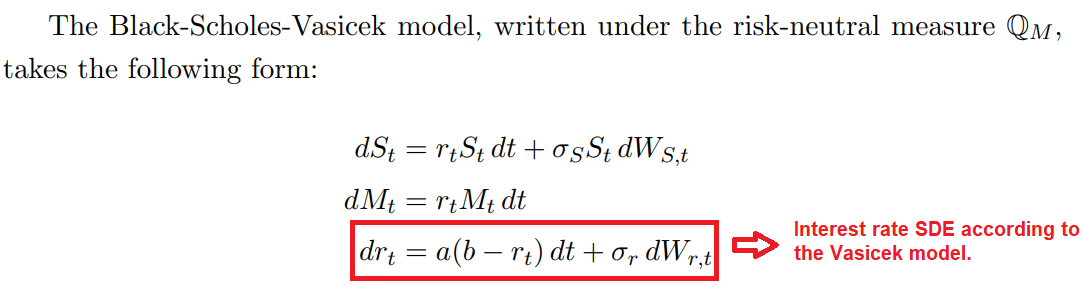

# Black-Scholes Monte Carlo

In [293]:
r = 0.06
sigma = 0.3
T = 1.0
S0 = 100

N = 10000  # number of different iterations / paths
M = 100  # number of steps

dt = T / M

S = np.zeros((M+1, M))
S[0] = S0  # at t=0, all prices are S0. (first row is S0 repeated.)
rn = np.random.standard_normal((M, M))
multipliers = np.exp((r - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * rn)
print("multipliers.shape =", multipliers.shape)
multipliers.cumprod(axis=0)

multipliers.shape = (100, 100)


array([[0.9922, 1.047 , 1.0234, ..., 1.0441, 0.974 , 0.9764],
       [1.0011, 1.0273, 0.9746, ..., 1.0587, 0.9693, 0.9947],
       [1.0464, 1.0089, 0.9564, ..., 1.092 , 0.9912, 1.0305],
       ...,
       [1.316 , 0.8254, 0.8384, ..., 1.0942, 0.9078, 0.9722],
       [1.2967, 0.8002, 0.8293, ..., 1.1066, 0.855 , 0.9508],
       [1.3217, 0.8071, 0.8563, ..., 1.0995, 0.8518, 0.9475]])

In [294]:
S[1:, :] = S0 * multipliers.cumprod(axis=0)
S

array([[100.    , 100.    , 100.    , ..., 100.    , 100.    , 100.    ],
       [ 99.2203, 104.7019, 102.3397, ..., 104.4101,  97.4018,  97.6362],
       [100.1091, 102.7337,  97.4647, ..., 105.8677,  96.9343,  99.4662],
       ...,
       [131.6042,  82.5416,  83.8383, ..., 109.4154,  90.784 ,  97.217 ],
       [129.6662,  80.0157,  82.929 , ..., 110.6622,  85.4989,  95.0788],
       [132.1703,  80.7092,  85.6258, ..., 109.9482,  85.1789,  94.7503]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


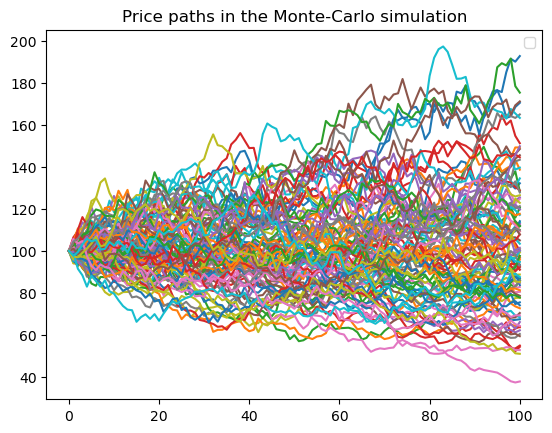

In [295]:
plt.plot(S[:, :100])
plt.title("Price paths in the Monte-Carlo simulation")
plt.legend()

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 2.,
        1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 4., 4., 2., 0.,
        2., 5., 1., 1., 3., 1., 4., 1., 1., 1., 0., 2., 4., 3., 3., 1., 0.,
        2., 2., 2., 1., 0., 2., 1., 3., 0., 1., 0., 1., 0., 0., 2., 0., 0.,
        2., 1., 0., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 37.8838,  39.4317,  40.9796,  42.5275,  44.0753,  45.6232,
         47.1711,  48.719 ,  50.2669,  51.8147,  53.3626,  54.9105,
         56.4584,  58.0063,  59.5541,  61.102 ,  62.6499,  64.1978,
         65.7457,  67.2935,  68.8414,  70.3893,  71.9372,  73.4851,
         75.0329,  76.5808,  78.1287,  79.6766,  81.2245,  82.7723,
         84.3202,  85.8681,  87.416 ,  88.9639,  90.5117,  92.0596,
         93.6075,  95.1554,  96.7033,  98.2511,  99.799 , 101.3469,
        102.8948, 104.4427, 105.9905, 107.5384, 109.0863, 110.6342,
      

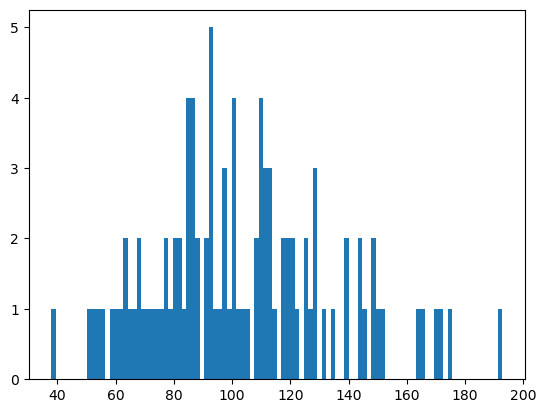

In [296]:
plt.hist(S[-1], bins=100)

In [297]:
np.set_printoptions(precision=4, suppress=True)

def BS_price(S0, K, r, sigma, T, t, call_or_put="C"):
    T = T-t
    d1 = (np.log(S0/K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if call_or_put == "C":
        return S0 * ss.norm.cdf(d1) - np.exp(-r*T) * K * ss.norm.cdf(d2)
    else:
        return np.exp(-r*T) * K * ss.norm.cdf(-d2) - S0 * ss.norm.cdf(-d1)
    
def MC_price(S0, K, r, sigma, T, M, Ite, t, call_or_put="C"):
    T = T - t
    dt = T / M
    S = np.zeros((M+1, Ite))
    S[0] = S0  # at t=0, all prices are S0. (first row is S0 repeated.)
    rn = np.random.standard_normal((M, Ite))
    multipliers = np.exp((r - sigma**2 / 2) * dt + sigma * np.sqrt(dt) * rn)
    print("multipliers.cumprod() =\n", multipliers.cumprod(axis=0))
    S[1:, :] = S0 * multipliers.cumprod(axis=0)  # price paths are generated
    print("S =\n", S)
    
    if call_or_put == "C":
        average_payoff = np.maximum(S[-1, :] - K, 0).mean()
    else:
        average_payoff = np.maximum(K - S[-1, :], 0).mean()
    
    opt_price = np.exp(-r*dt) * average_payoff
    return opt_price

In [298]:
BS_price(100, 95, 0.06, 0.3, 1, 0, "C")

17.32356328325764

In [299]:
MC_price(100, 95, 0.06, 0.3, 1, 100, 100000, 0, "C")

multipliers.cumprod() =
 [[1.0022 1.0033 1.0543 ... 0.9948 0.9926 0.998 ]
 [1.0094 1.0137 1.082  ... 1.0129 0.9743 1.0133]
 [1.0442 0.9884 1.0851 ... 0.9874 0.9697 0.9714]
 ...
 [1.3173 1.0889 1.0349 ... 0.7296 0.7246 1.1278]
 [1.3335 1.053  1.0205 ... 0.7268 0.7193 1.1578]
 [1.2873 1.0545 1.0469 ... 0.6998 0.7416 1.155 ]]
S =
 [[100.     100.     100.     ... 100.     100.     100.    ]
 [100.2223 100.3335 105.4343 ...  99.4756  99.2622  99.8041]
 [100.9379 101.3734 108.2048 ... 101.2928  97.4289 101.3326]
 ...
 [131.7262 108.8948 103.4857 ...  72.9646  72.4596 112.7783]
 [133.3499 105.2985 102.0471 ...  72.6754  71.9332 115.781 ]
 [128.7281 105.4471 104.6881 ...  69.9772  74.1555 115.4951]]


18.26832465518164

_______________________

# Vasicek Interest Rate Model

Vasicek **mean-reverting risk-neutral** process for interest rates $r_t:$

$dr_t = k (\theta - r_t) dt + \sigma dW_t, \qquad dW_t \sim N(0, \sqrt{dt})$

where,

$k:$ Speed of reversion

$\theta:$ Long-term **mean** of the interest rates

$\sigma:$ Instantenous **volatility** of the interest rates.

$\frac{\sigma^2}{2 k}$ can be defined as the **long term variance** of interest rates

In [300]:
def vasicek(r0, k, theta, sigma, T, N, M):
    """_summary_

    Args:
        r0 (_type_): starting interest rate
        k (_type_): speed of mean-reversion
        theta (_type_): long term average of interest rates
        sigma (_type_): short-term volatility of interest rates
        T (_type_): maturity
        N (_type_): num of steps
        M (_type_): num of paths
    """
    dt = T / N
    rn = np.random.standard_normal((N, M))
    R = np.zeros((N, M))
    R[0, :] = r0  # first row is initial rates
    print("R =\n", R)
    for i in range(N-1):
        # print("R[i, :] =\n", R[i, :])
        R[i+1, :] = k * (theta - R[i, :]) * dt + sigma * np.sqrt(dt) * rn[i, :]
    return R

M = 100  # Number of paths for MC
N = 100  # Number of steps
T = 1.0  # Maturity
r0 = 0.01875
k = 0.20
theta = 0.01
sigma = 0.012

rates = vasicek(r0, k, theta, sigma, T, N, M)
rates

R =
 [[0.0187 0.0187 0.0187 ... 0.0187 0.0187 0.0187]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


array([[ 0.0187,  0.0187,  0.0187, ...,  0.0187,  0.0187,  0.0187],
       [ 0.0016,  0.0024,  0.0014, ..., -0.0009,  0.0014,  0.0004],
       [-0.0002, -0.0032,  0.0008, ...,  0.0015, -0.0001, -0.0015],
       ...,
       [-0.0013,  0.0023,  0.0001, ..., -0.0003,  0.0009,  0.0007],
       [-0.0014, -0.    , -0.0015, ...,  0.0004,  0.0014, -0.001 ],
       [-0.0002,  0.0003, -0.0002, ..., -0.0004, -0.0003, -0.0015]])

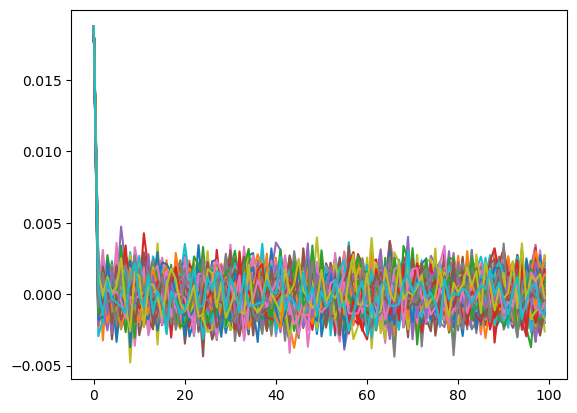

In [301]:
# plt.xlim([0, T])
plt.plot(rates)